We load image data from the specified folders and prepare the corresponding labels. We combine the data and labels into a DataFrame for easier manipulation. We display a sample image from each class to visually check the data. Finally, we split the data into training and test sets to prepare our model.








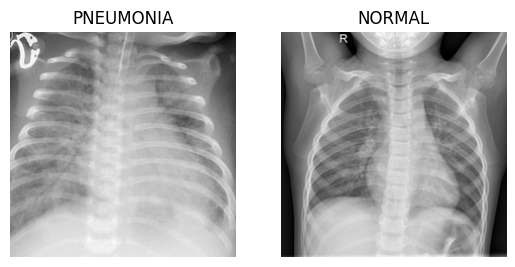

Taille de X_train  : 5216
Taille de X_test  : 624
Taille de y_train  : 5216
Taille de y_test  : 624


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image, ImageOps, ImageEnhance
import joblib

# Paths to folders containing images
train_data_pneumonia_path = r'../dataset/train/PNEUMONIA'
train_data_normal_path = r'../dataset/train/NORMAL'

test_data_pneumonia_path = r'../dataset/test/PNEUMONIA'
test_data_normal_path = r'../dataset/test/NORMAL'

def load_images_from_folder(folder_path, label, target_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            img = Image.open(os.path.join(folder_path, filename))
            if img is not None:
                # Resize and crop the image to the target size
                img = ImageOps.fit(img, target_size, Image.LANCZOS)
                images.append(np.array(img))
                labels.append(label)
    return images, labels

# Load PNEUMONIA images
pneumonia_images, pneumonia_labels = load_images_from_folder(train_data_pneumonia_path, 'PNEUMONIA')
pneumonia_images_test, pneumonia_labels_test = load_images_from_folder(test_data_pneumonia_path, 'PNEUMONIA')

# Load NORMAL images
normal_images, normal_labels = load_images_from_folder(train_data_normal_path, 'NORMAL')
normal_images_test, normal_labels_test = load_images_from_folder(test_data_normal_path, 'NORMAL')

# Create a DataFrame from images and labels
df = pd.DataFrame({'image': pneumonia_images + normal_images, 'label': pneumonia_labels + normal_labels})
df_test = pd.DataFrame({'image': pneumonia_images_test + normal_images_test, 'label': pneumonia_labels_test + normal_labels_test})

# Display an image from each class as an example
fig, axs = plt.subplots(1, 2)
axs[0].imshow(pneumonia_images[0], cmap='gray')
axs[0].set_title('PNEUMONIA')
axs[0].axis('off')
axs[1].imshow(normal_images[0], cmap='gray')
axs[1].set_title('NORMAL')
axs[1].axis('off')
plt.show()

# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(df['image'].tolist(), df['label'], test_size=0.3, random_state=42)
X_train=df['image'].tolist()
y_train=df['label']
X_test=df_test['image'].tolist()
y_test=df_test['label']
# Display sizes after splitting
print("Taille de X_train  :", len(X_train))
print("Taille de X_test  :", len(X_test))
print("Taille de y_train  :", len(y_train))
print("Taille de y_test  :", len(y_test))



We resize and pad the training and test images so that they all have the same size.








In [5]:
# Define target size for resizing
target_size = (300, 300)

# Resize all images to the target size
X_train_resized = []
y_train_temp = []
for img in X_train:
    resized_img = np.array(Image.fromarray(img).resize(target_size))
    X_train_resized.append(resized_img)
X_test_resized = []
for img in X_test:
    resized_img = np.array(Image.fromarray(img).resize(target_size))
    X_test_resized.append(resized_img)
  
# Define target size for resizing
target_size = (300, 300)

def resize_and_pad(img, target_size):
    # Convert the image to PIL Image
    img_pil = Image.fromarray(img)
    
    # Resize and crop the image to the target size
    img_pil_resized = ImageOps.fit(img_pil, target_size, Image.LANCZOS)
    
    # Fill extra areas with a white background
    background = Image.new('RGB', target_size, (255, 255, 255))
    offset = ((target_size[0] - img_pil_resized.width) // 2, (target_size[1] - img_pil_resized.height) // 2)
    background.paste(img_pil_resized, offset)
    
    # Convert the image to a numpy array
    resized_img_np = np.array(background)
    
    return resized_img_np

# Resize and pad training images
X_train_reshape = [resize_and_pad(img, target_size) for img in X_train]

# Resize and pad test images
X_test_reshape = [resize_and_pad(img, target_size) for img in X_test]

# Check the lengths of the reshaped training and test arrays
print("Longueur de X_train_reshaped :", len(X_train_reshape))
print("Longueur de X_test_reshaped :", len(X_test_reshape))
print("Longueur de y_train :", len(y_train))
print("Longueur de y_test :", len(y_test))

# Flatten the images to make them 2D
X_train_flat = np.array([img.flatten() for img in X_train_reshape])
X_test_flat = np.array([img.flatten() for img in X_test_reshape])


Longueur de X_train_reshaped : 5216
Longueur de X_test_reshaped : 624
Longueur de y_train : 5216
Longueur de y_test : 624


In this section, we initialize and train the k-NN model with 4 neighbors, then evaluate its performance on the test set. Next, we display a confusion matrix to check the results and the performance of our model.








Model saved as knn_model.pkl
Accuracy: 0.7724358974358975
Error Rate: 0.22756410256410253


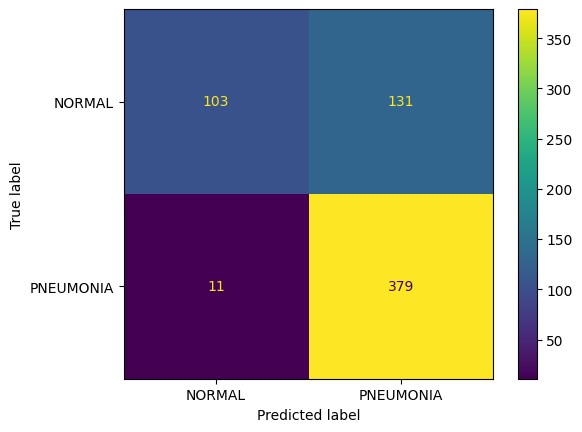

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Initialize and train the k-NN model
# class sklearn.neighbors.KNeighborsClassifier(n_neighbors=4, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)[source]
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_flat, y_train)

# Add this section to save the model
joblib_file = "knn_model.pkl"
joblib.dump(knn, joblib_file)
print(f"Model saved as {joblib_file}")

# Predict labels on the test set
y_pred = knn.predict(X_test_flat)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate error rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()


The cross-validation results show an average accuracy of 94.03%, with individual scores ranging between 93.56% and 94.66%.

This indicates that the k-NN model performs consistently well across different subsets of the training data, demonstrating its robustness and ability to generalize to new data. The narrow range of accuracy scores further suggests that the model's performance is stable and reliable.

In [7]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X_train_flat, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [0.91475096 0.91371045 0.94439118 0.94918504 0.93959732]
Average cross-validation score: 0.9323269892698267


We calculate the precision, recall (Recall measures the ability of a model to identify all relevant instances of a class), and F1 score (The F1 score is the average of precision and recall) of the k-NN model and display these metrics.








In [8]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Calculate the precision, recall, and F1 score of the model
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Precision: 0.8032765737874097
Recall: 0.7724358974358975
F1 Score: 0.7483716475095785


This code trains a k-NN model with different values of k (number of neighbors) to determine the one that gives the best accuracy. It records the accuracies obtained for each value of k and plots a graph to visualize how the model's accuracy varies with the number of neighbors, thereby allowing the optimal value of k to be chosen for this model.








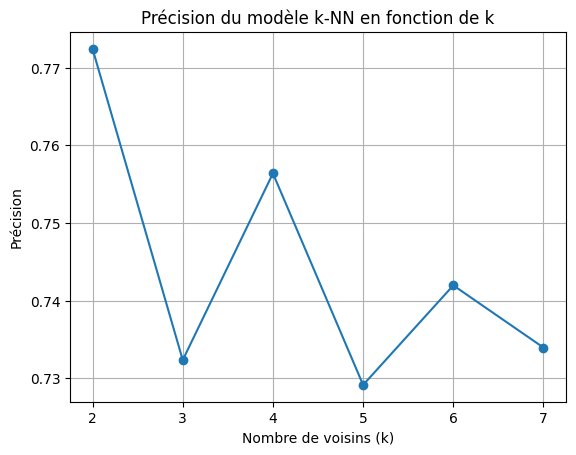

In [9]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List of k values to test
k_values = [ 2, 3, 4, 5, 6, 7 ]

# List to store accuracies
accuracies = []

# Train the model for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_flat, y_train)
    y_pred = knn.predict(X_test_flat)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy as a function of k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Précision')
plt.title('Précision du modèle k-NN en fonction de k')
plt.grid(True)
plt.show()



Why do even values seem to give better results?

When an odd number of neighbors is chosen, if the class distribution among these neighbors is equal, it means there is no clearly defined majority class. This can lead to uncertainties in the final prediction. On the other hand, with an even number of neighbors, even in the case of a tie, there will always be a majority class, which makes the decision clearer and thus potentially more reliable.